# TED Talks Data exploration

Not too long ago, I made a half-joking bet with someone that I'd give a TED talk in the next five years. Having yet to make any progress towards that goal, I think exploring the past TED talks and understanding the characteristics of a popular talk is a good place to start. 

## Data

The TED Talks [dataset](https://www.kaggle.com/rounakbanik/ted-talks) contains information on all the audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017.

The data was compiled by Rounak Banik from the official TED website, published on Kaggle, and it contains two files:

 * ted_main.csv - Contains metadata on each talk and speaker. 
 * transcripts.csv - Contains transcript and URL information for TED Talks

For this study, I'm focusing on the metadata for the talks, and not using the transcripts.

The data, ted_main.csv is a flat file where each row is a unique talk and it contains the following variables for each talk: Comments - the number of comments from users on the site, description, duration, event, film date, languages, main speaker, name, number of speakers, published date, ratings, related talks, speaker occupation, tags, title, url, views.


In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ted = pd.read_csv("ted_main.csv")

In [7]:
ted.shape

(2550, 17)

In [8]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


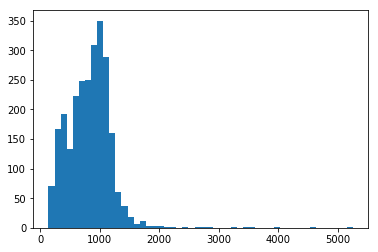

In [15]:
plt.hist(ted['duration'], bins=50)
plt.show()

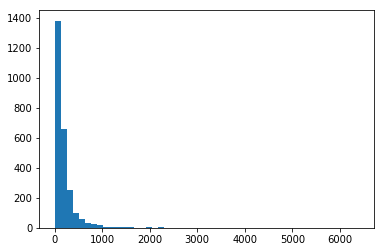

In [16]:
plt.hist(ted['comments'], bins=50)
plt.show()

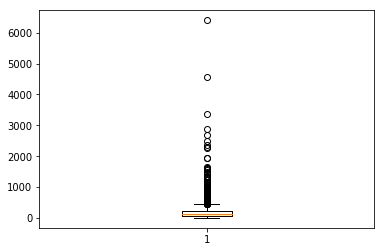

In [17]:
plt.boxplot(ted['comments'])
plt.show()

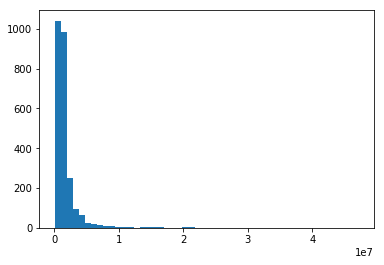

In [20]:
plt.hist(ted['views'], bins=50)
plt.show()

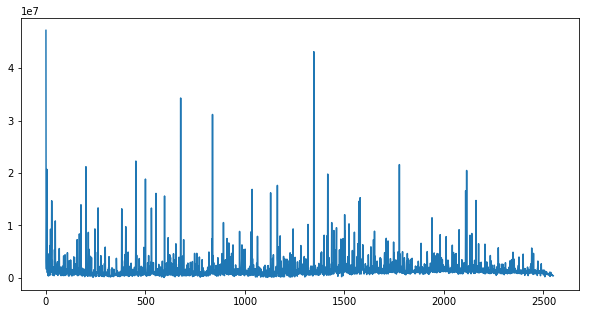

In [30]:
plt.figure(figsize=(10,5))
plt.plot(ted['views'])
plt.show()

In [9]:
len(ted['event'].unique())

355

In [24]:
print(ted['event'].unique())

['TED2006' 'TED2004' 'TED2005' 'TEDGlobal 2005' 'TEDSalon 2006' 'TED2003'
 'TED2007' 'TED2002' 'TEDGlobal 2007' 'TEDSalon 2007 Hot Science'
 'Skoll World Forum 2007' 'TED2008' 'TED1984' 'TED1990' 'DLD 2007'
 'EG 2007' 'TED1998' 'LIFT 2007' 'TED Prize Wish'
 'TEDSalon 2009 Compassion' 'Chautauqua Institution' 'Serious Play 2008'
 'Taste3 2008' 'TED2001' 'TED in the Field' 'TED2009' 'EG 2008'
 'Elizabeth G. Anderson School' 'TEDxUSC' 'TED@State' 'TEDGlobal 2009'
 'TEDxKC' 'TEDIndia 2009' 'TEDSalon London 2009'
 'Justice with Michael Sandel' 'Business Innovation Factory' 'TEDxTC'
 'Carnegie Mellon University' 'Stanford University' 'AORN Congress'
 'University of California' 'TEDMED 2009' 'Royal Institution'
 'Bowery Poetry Club' 'TEDxSMU' 'Harvard University' 'TEDxBoston 2009'
 'TEDxBerlin' 'TED2010' 'TEDxAmsterdam' 'World Science Festival' 'BBC TV'
 'Arbejdsglaede Live' 'Web 2.0 Expo 2008' 'TEDxNASA'
 'Michael Howard Studios' 'DICE Summit 2010'
 "Eric Whitacre's Virtual Choir" 'Mission B

In [10]:
len(ted['main_speaker'].unique())

2156

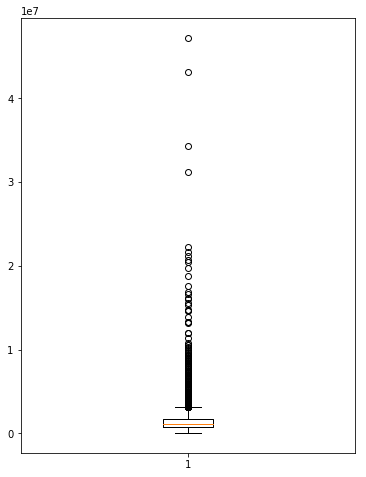

In [28]:
plt.figure(figsize=(6,8))
plt.boxplot(ted['views'])
plt.show()

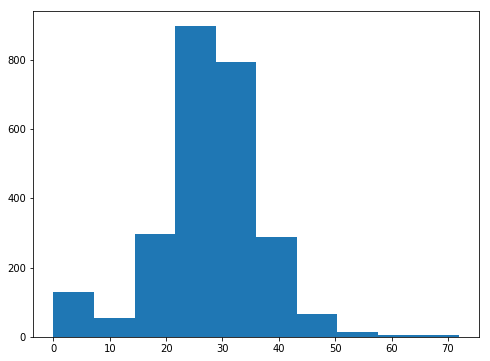

In [21]:
plt.figure(figsize=(8,6))
plt.hist(ted['languages'])
plt.show()

In [19]:
max(ted['views'])

47227110

In [20]:
min(ted['views'])

50443

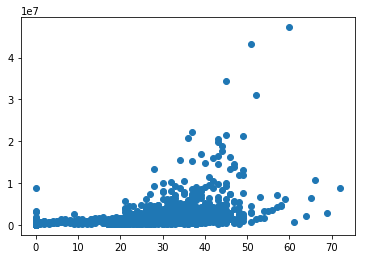

In [21]:
plt.scatter(ted['languages'], ted['views'])

possible analytic questions: 
What are the most common topics (tags), and what topics recieve the most views?

do talks that people most often rate as funny correlate with high total views? 

Is there a correlation between publish date and total views? Do older talks have more views because they've been on the site longer or do newer talks have more views as a result of the fan base growing over time. 

Which Ted events have been the most popular, least popular in terms of views?

Is there a correlation between duration and talks that are rated 'longwinded', 'obnoxious', or 'unconvincing'?


In [25]:
ted['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

Possible ratings, User is asked to select up to 3, if only one is chosen it will count 3 times:

Informative    Confusing  Jaw-dropping    Ingenious  Persuasive    Inspiring  Longwinded    Unconvincing  Fascinating    OK  Beautiful    Courageous  Funny    Obnoxious

Future research ideas:

build a recommendation tool to suggest what talks the viewer would like.
use deep learning on the transcripts to write a ted talk.
